# Testing `climpred`

In [34]:
import xarray as xr
import pandas as pd
import numpy as np
import climpred
import cftime

In [2]:
data = np.random.normal(
    size = (3, 3, 4, 5)
)

In [42]:
da = xr.DataArray(
    data,
    dims = ['x', 'y', 'init', 'lead'],
    coords = {
        'x': range(3),
        'y': range(3),
        'init': xr.cftime_range(start="2010-01-01", end="2010-01-04", freq="1D"),
        'lead': range(5)
    }
)

In [43]:
da["lead"].attrs["units"] = "days"

In [47]:
hind = climpred.utils.add_time_from_init_lead(da)

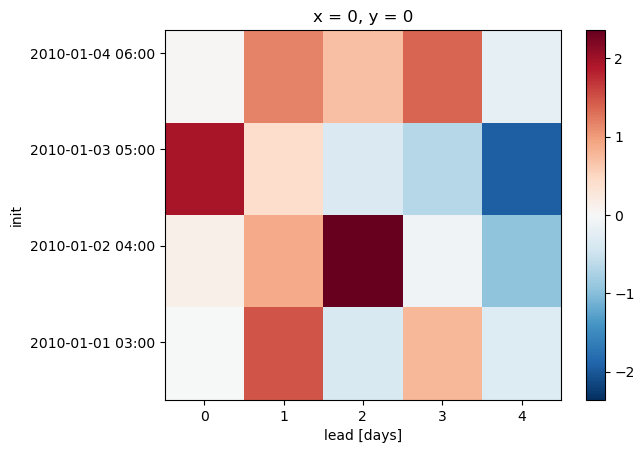

In [48]:
hind.isel(x=0,y=0).plot()

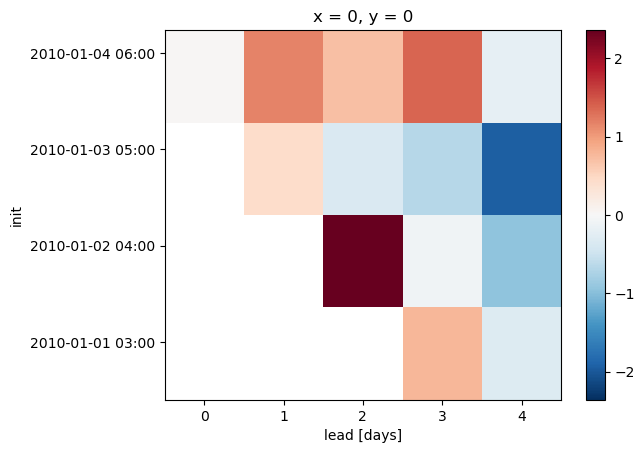

In [49]:
hind.where(
    hind.valid_time > cftime.datetime(2010, 1, 3)
).isel(x=0,y=0).plot()

In [14]:
hind.isel(x=0, y=0, init=1)

<xarray.DataArray (lead: 5)>
array([ 0.14043449,  0.89300636,  2.35887802, -0.10588675, -0.95677266])
Coordinates:
    x           int64 0
    y           int64 0
    init        object 2010-01-02 00:00:00
  * lead        (lead) int64 0 1 2 3 4
    valid_time  (lead) object 2010-01-02 00:00:00 ... 2010-01-06 00:00:00